# Crossover Results

This notebook is an analysis of the results from various crossovers and different parameters, with the intent to analyse and study the results

In [3]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt

from scipy.stats import wilcoxon

### Function:

We create a general function that is capable of creating all necessary graphs for all crossovers tested. 

In [12]:
def plot_median_metrics(dataset, xo_name, path):

    #import data
    df = pd.read_csv(path, names =['slim_version', 'run_id', 'dataset', 'id', 'gens', 'train_fitness', 'time', 'population_node_count', 'test_fitness', 'elite_node_count','repr', 'log'] )
    print(df.shape)
    df.head()

    df.drop(['run_id', 'dataset', 'id',  'log',"repr"], axis = 1, inplace = True)

    # Assuming df is your DataFrame, and you've grouped by 'gens' and 'algorithm_version'
    df_median = df.groupby(['slim_version','gens']).median().reset_index()

    # Custom color and line style dictionaries
    custom_colors = {
    "SLIM+SIG2": 'orange',
    "SLIM*ABS": 'green',
                    }

    custom_linestyles = {
    "SLIM+SIG2": '-',
    "SLIM*ABS": '-',
                        }

    # Create a figure with 1 row and 3 columns of subplots
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Get the unique algorithm versions
    algorithm_versions = df_median['slim_version'].unique()

    # Plot each variable with lines for each algorithm version
    for version in algorithm_versions:
        # Filter the data for the specific algorithm version
        version_data = df_median[df_median['slim_version'] == version]
    
        # Plot train_fitness vs gens
        axs[0].plot(
        version_data['gens'], 
        version_data['train_fitness'], 
        label=f'{version}', 
        color=custom_colors.get(version, 'black'),  # Default to black if version not in dict
        linestyle=custom_linestyles.get(version, '-'),  # Default to solid line if version not in dict
        linewidth=2
                    )
    
        # Plot test_fitness vs gens
        axs[1].plot(
        version_data['gens'], 
        version_data['test_fitness'], 
        label=f'{version}', 
        color=custom_colors.get(version, 'black'), 
        linestyle=custom_linestyles.get(version, '-'),
         linewidth=2
        )
    
        # Plot elite_node_count vs gens
        axs[2].plot(
        version_data['gens'], 
        version_data['elite_node_count'], 
        label=f'{version}', 
        color=custom_colors.get(version, 'black'), 
        linestyle=custom_linestyles.get(version, '-'),
        linewidth=2
        )

    # Add titles and labels for each subplot
    axs[0].set_title('Median Train Fitness')
    axs[0].set_xlabel('Generation')
    axs[0].set_ylabel('Train Fitness')

    axs[1].set_title('Median Test Fitness')
    axs[1].set_xlabel('Generation')
    axs[1].set_ylabel('Test Fitness')

    axs[2].set_title('Median Size of the Elite')
    axs[2].set_xlabel('Generation')
    axs[2].set_ylabel('Size of the Elite')

    # Add a legend to the last subplot
    axs[2].legend(loc='best', title='SLIM Version', bbox_to_anchor=(1.05, 1))

    # Adjust layout for better spacing
    plt.tight_layout()

    #Save figure:
    my_directory = f'/Users/sofiapereira/Desktop/Master Thesis/images/{xo_name}'
    os.makedirs(my_directory, exist_ok=True)
    file_name = os.path.join(my_directory, f"{xo_name}_{dataset}.png")
    plt.savefig(file_name, dpi=300)  # Save the plot with high resolution
    print(f"Plot saved at: {file_name}")

    # Show the plot
    plt.show()
    

In [64]:
def plot_median_metrics_3datasets(datasets, xo_name, paths, dt):
    """
    Generate plots for 3 datasets, each having 3 metrics (train_fitness, test_fitness, elite_node_count).
    
    Parameters:
    datasets (list): Names of the datasets (3 expected).
    xo_name (str): Name for saving files.
    paths (list): Paths to the CSV files (3 expected).
    """
    # Custom color and line style dictionaries
    custom_colors = {
        "SLIM+SIG2": 'orange',
        "SLIM*ABS": 'green',
    }

    custom_linestyles = {
        "SLIM+SIG2": '-',
        "SLIM*ABS": '-',
    }

    # Create a figure with 3 rows and 3 columns of subplots
    fig, axs = plt.subplots(3, 3, figsize=(12, 8))

    for row_idx, (dataset, path) in enumerate(zip(datasets, paths)):
        # Import data
        df = pd.read_csv(path, names=['slim_version', 'run_id', 'dataset', 'id', 'gens', 'train_fitness', 'time', 'population_node_count', 'test_fitness', 'elite_node_count', 'repr', 'log'])

        # Drop unnecessary columns
        df.drop(['run_id', 'dataset', 'id', 'log', 'repr'], axis=1, inplace=True)

        # Calculate median values grouped by 'slim_version' and 'gens'
        df_median = df.groupby(['slim_version', 'gens']).median().reset_index()

        # Get unique algorithm versions
        algorithm_versions = df_median['slim_version'].unique()

        # Plot each variable for the current dataset
        for version in algorithm_versions:
            version_data = df_median[df_median['slim_version'] == version]

            # Plot train_fitness
            axs[row_idx, 0].plot(
                version_data['gens'], 
                version_data['train_fitness'], 
                label=f'{version}', 
                color=custom_colors.get(version, 'black'),
                linestyle=custom_linestyles.get(version, '-'), 
                linewidth=2
            )

            # Plot test_fitness
            axs[row_idx, 1].plot(
                version_data['gens'], 
                version_data['test_fitness'], 
                label=f'{version}', 
                color=custom_colors.get(version, 'black'), 
                linestyle=custom_linestyles.get(version, '-'),
                linewidth=2
            )

            # Plot elite_node_count
            axs[row_idx, 2].plot(
                version_data['gens'], 
                version_data['elite_node_count'], 
                label=f'{version}', 
                color=custom_colors.get(version, 'black'), 
                linestyle=custom_linestyles.get(version, '-'),
                linewidth=2
            )

        # Add dataset name on the left of each row
        axs[row_idx, 0].set_ylabel(dataset, fontsize=12, labelpad=20, rotation=90, ha='center')

    # Add titles for each column
    axs[0, 0].set_title('Median Train Fitness')
    axs[0, 1].set_title('Median Test Fitness')
    axs[0, 2].set_title('Median Size of the Elite')

    # Add x-axis labels to the bottom row
    for col_idx in range(3):
        axs[2, col_idx].set_xlabel('Generation')

    # Add legends
    handles, labels = axs[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=len(handles), title='SLIM Version',fontsize=10, title_fontsize=12 )

    # Adjust layout for better spacing
    plt.tight_layout(rect=[0, 0, 1, 0.92])

    # Save figure
    my_directory = f'/Users/sofiapereira/Desktop/Master Thesis/images/{xo_name}'
    os.makedirs(my_directory, exist_ok=True)
    file_name = os.path.join(my_directory, f"{xo_name}_{dt}.png")
    plt.savefig(file_name, dpi=300)
    print(f"Plot saved at: {file_name}")

    # Show the plot
    plt.show()

# Example usage
# plot_median_metrics_3datasets(["Dataset1", "Dataset2", "Dataset3"], "XO_Name", ["path1.csv", "path2.csv", "path3.csv"])


## Donor_xo

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/donor_xo/donor_xo_1.png


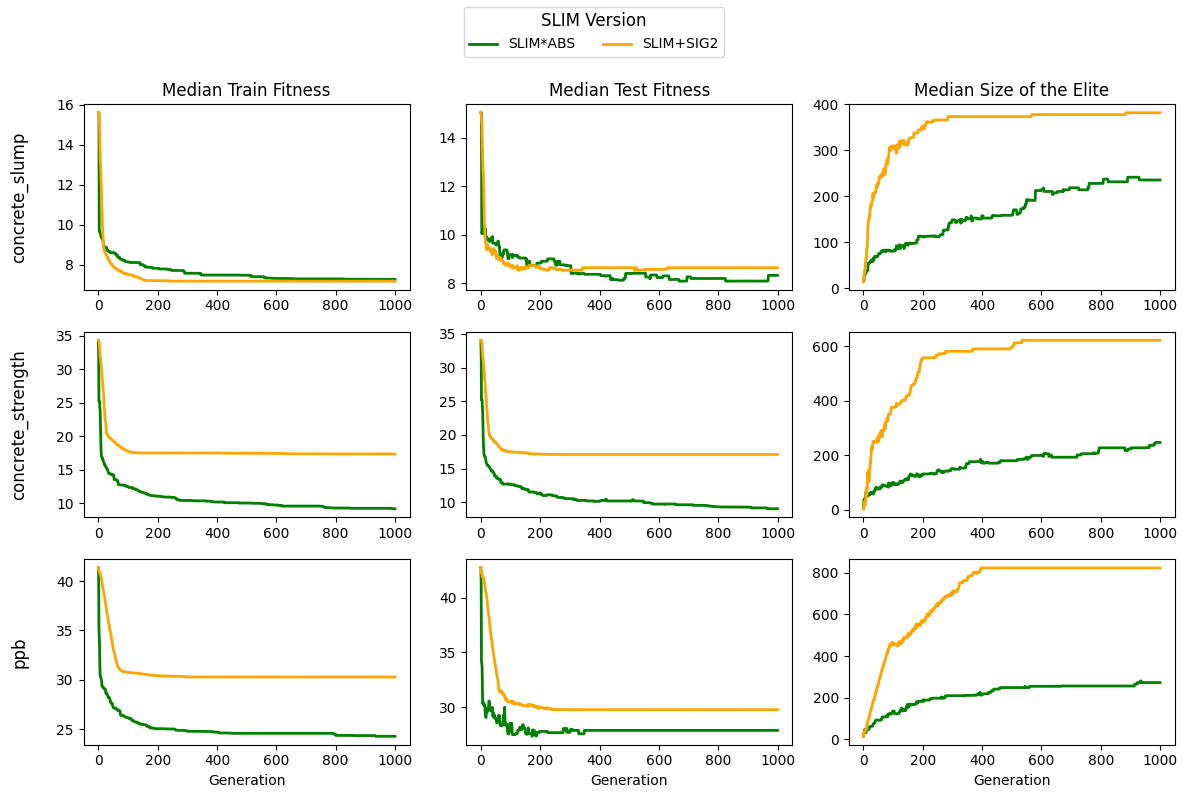

In [58]:
plot_median_metrics_3datasets(["concrete_slump", "concrete_strength", "ppb"], "donor_xo", ['log/donor_xo/concrete_slump_donor_xo.csv', 'log/donor_xo/concrete_strength_donor_xo.csv', 'log/donor_xo/ppb_donor_xo.csv'])

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/donor_xo/donor_xo_2.png


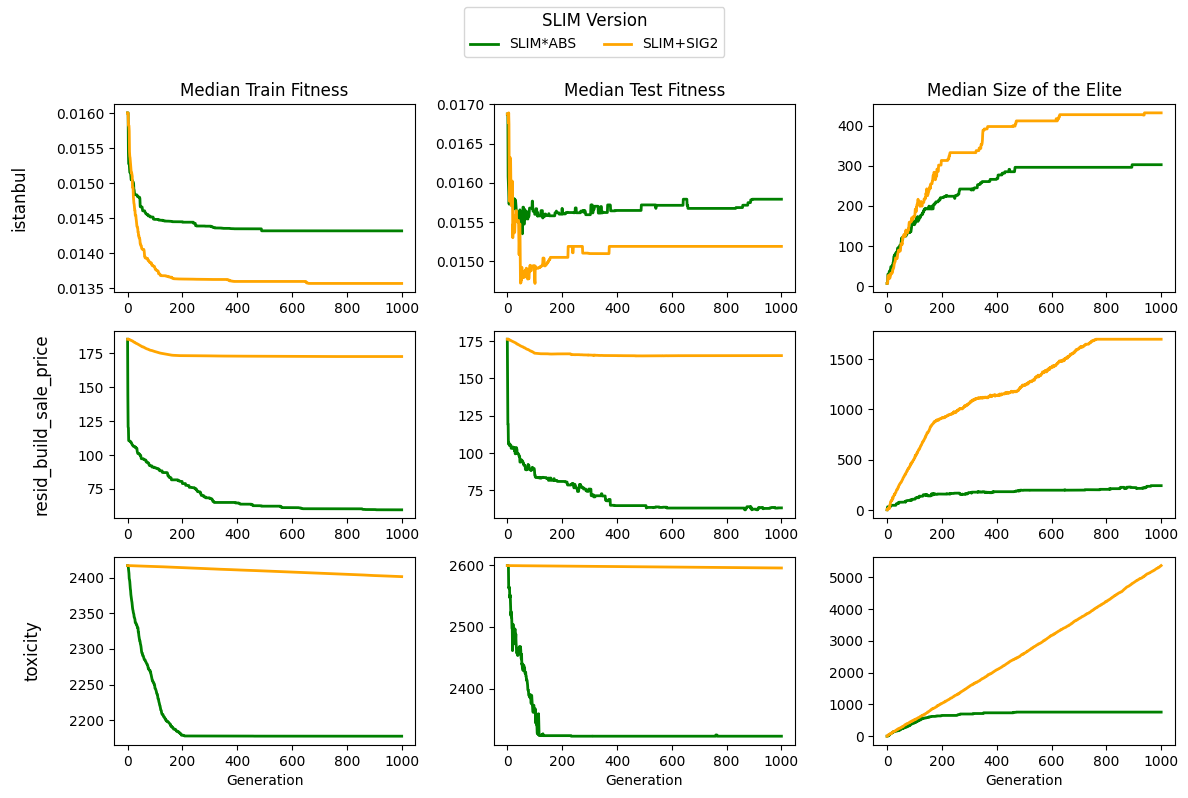

In [60]:
plot_median_metrics_3datasets(["istanbul", "resid_build_sale_price", "toxicity"], "donor_xo", ['log/donor_xo/istanbul_donor_xo.csv', 'log/donor_xo/resid_build_sale_price_donor_xo.csv', 'log/donor_xo/toxicity_donor_xo.csv'])

## Donor_n_xo

For each dataset, n = 1,5,25

#### Concrete Slump

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/donor_n_xo/donor_n_xo_concrete_slump.png


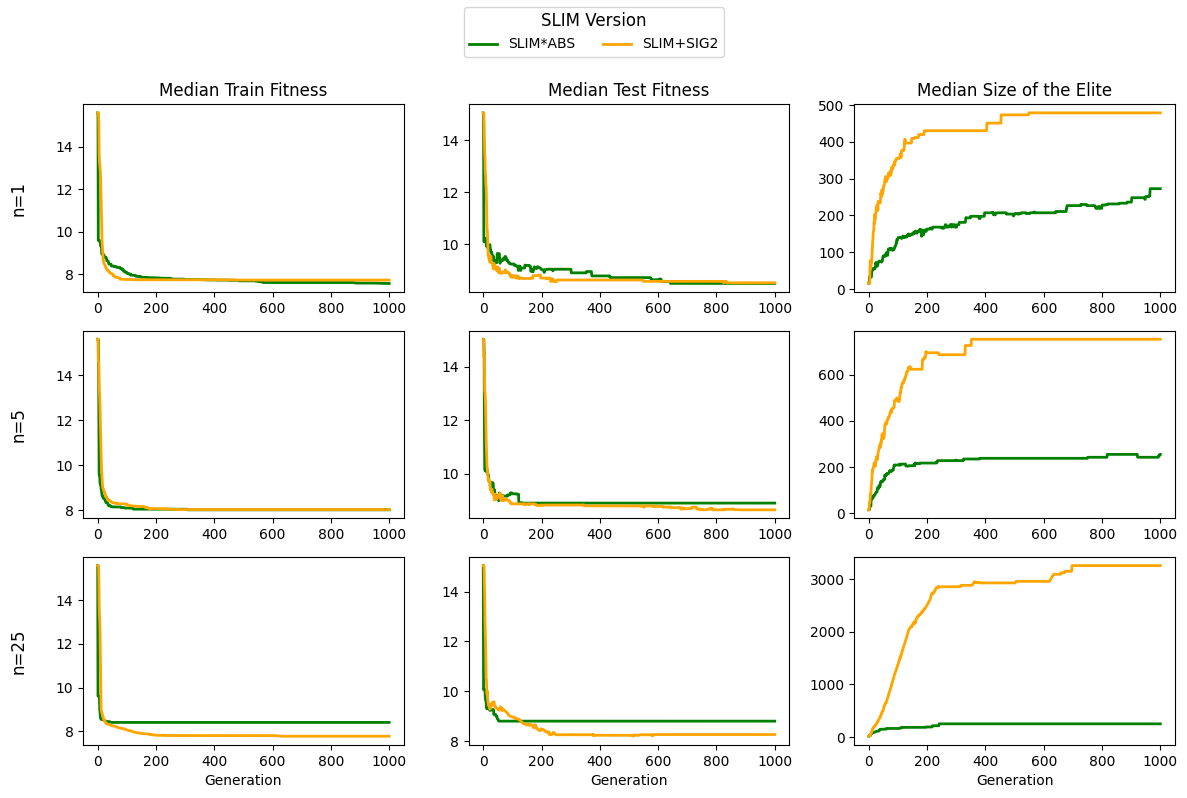

In [65]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "donor_n_xo", ['log/donor_n_xo/1_new_donor_n_xo/concrete_slump_1_new_donor_n_xo.csv', 'log/donor_n_xo/5_new_donor_n_xo/concrete_slump_5_new_donor_n_xo.csv', 'log/donor_n_xo/25_new_donor_n_xo/concrete_slump_25_new_donor_n_xo.csv'], "concrete_slump")

#### Concrete Strength

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/donor_n_xo/donor_n_xo_concrete_strength.png


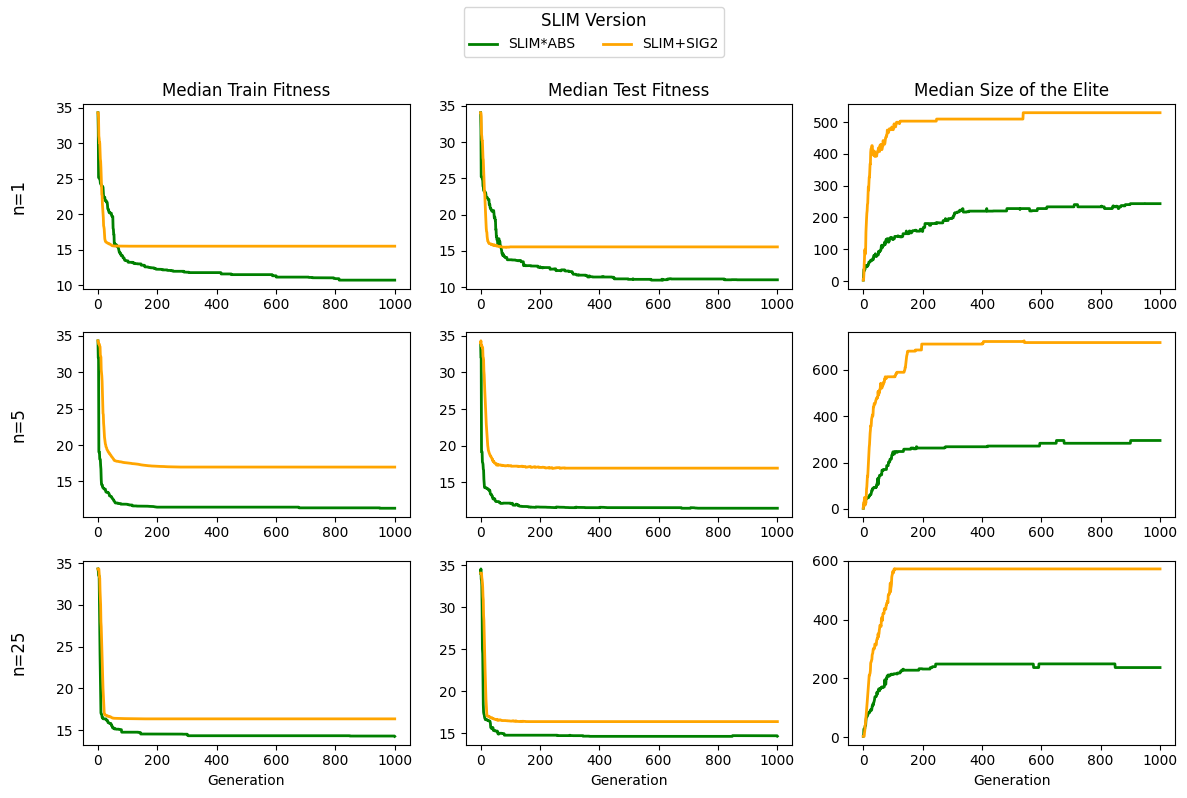

In [66]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "donor_n_xo", ['log/donor_n_xo/1_new_donor_n_xo/concrete_strength_1_new_donor_n_xo.csv', 'log/donor_n_xo/5_new_donor_n_xo/concrete_strength_5_new_donor_n_xo.csv', 'log/donor_n_xo/25_new_donor_n_xo/concrete_strength_25_new_donor_n_xo.csv'], "concrete_strength")

#### Istanbul

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/donor_n_xo/donor_n_xo_istanbul.png


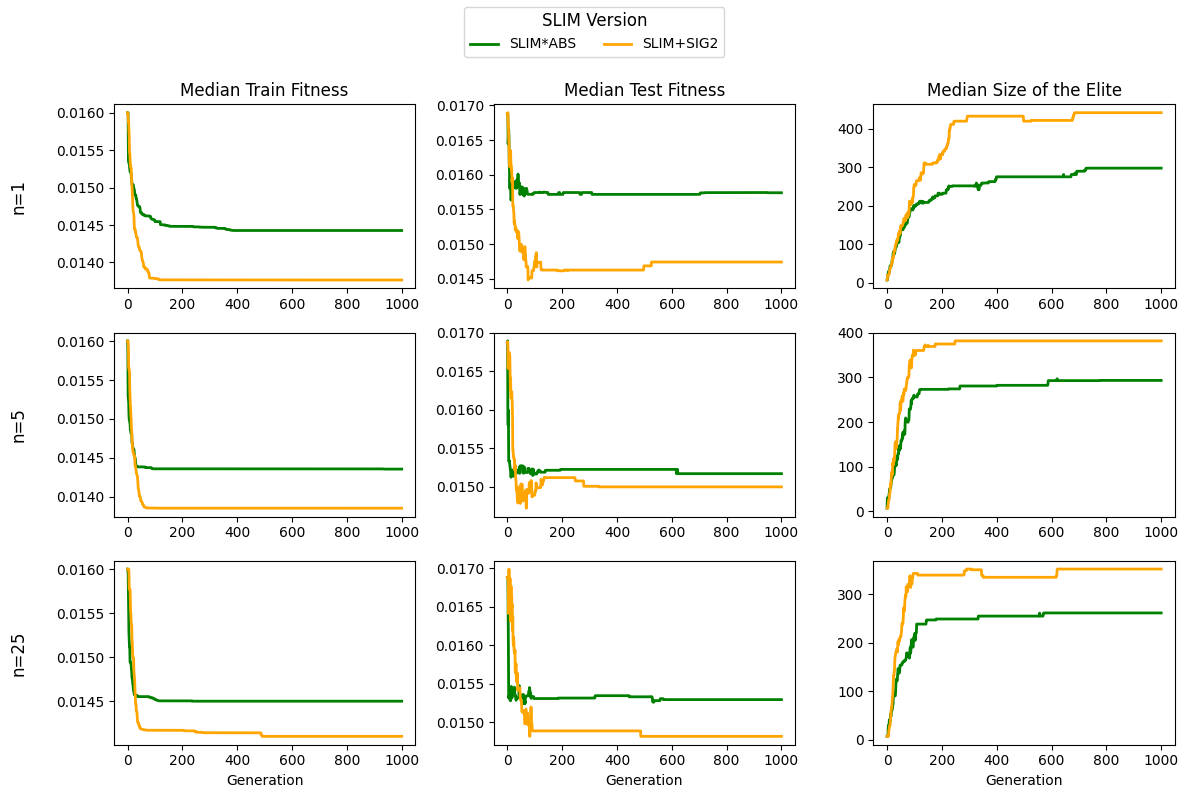

In [67]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "donor_n_xo", ['log/donor_n_xo/1_new_donor_n_xo/istanbul_1_new_donor_n_xo.csv', 'log/donor_n_xo/5_new_donor_n_xo/istanbul_5_new_donor_n_xo.csv', 'log/donor_n_xo/25_new_donor_n_xo/istanbul_25_new_donor_n_xo.csv'], "istanbul")

#### PPB

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/donor_n_xo/donor_n_xo_ppb.png


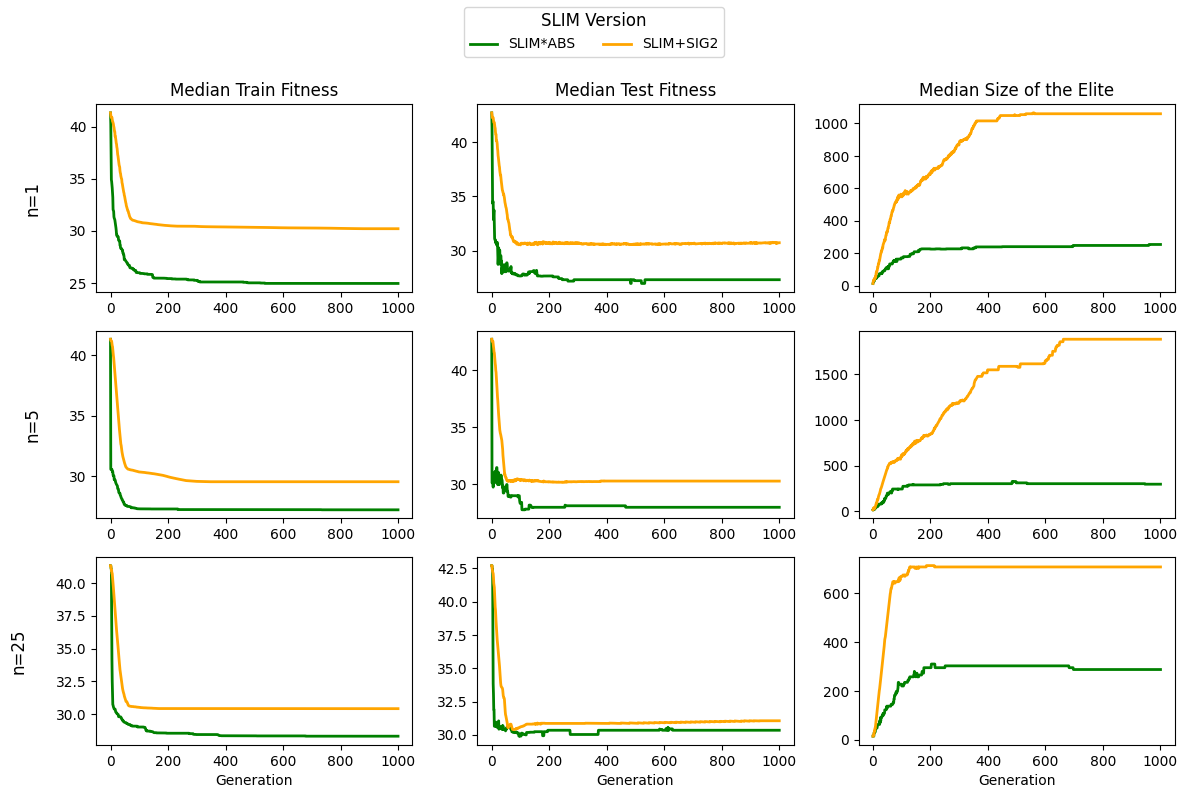

In [68]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "donor_n_xo", ['log/donor_n_xo/1_new_donor_n_xo/ppb_1_new_donor_n_xo.csv', 'log/donor_n_xo/5_new_donor_n_xo/ppb_5_new_donor_n_xo.csv', 'log/donor_n_xo/25_new_donor_n_xo/ppb_25_new_donor_n_xo.csv'], "ppb")

#### Resid_Build_Sale_Price (RBSP)

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/donor_n_xo/donor_n_xo_resid_build_sale_price.png


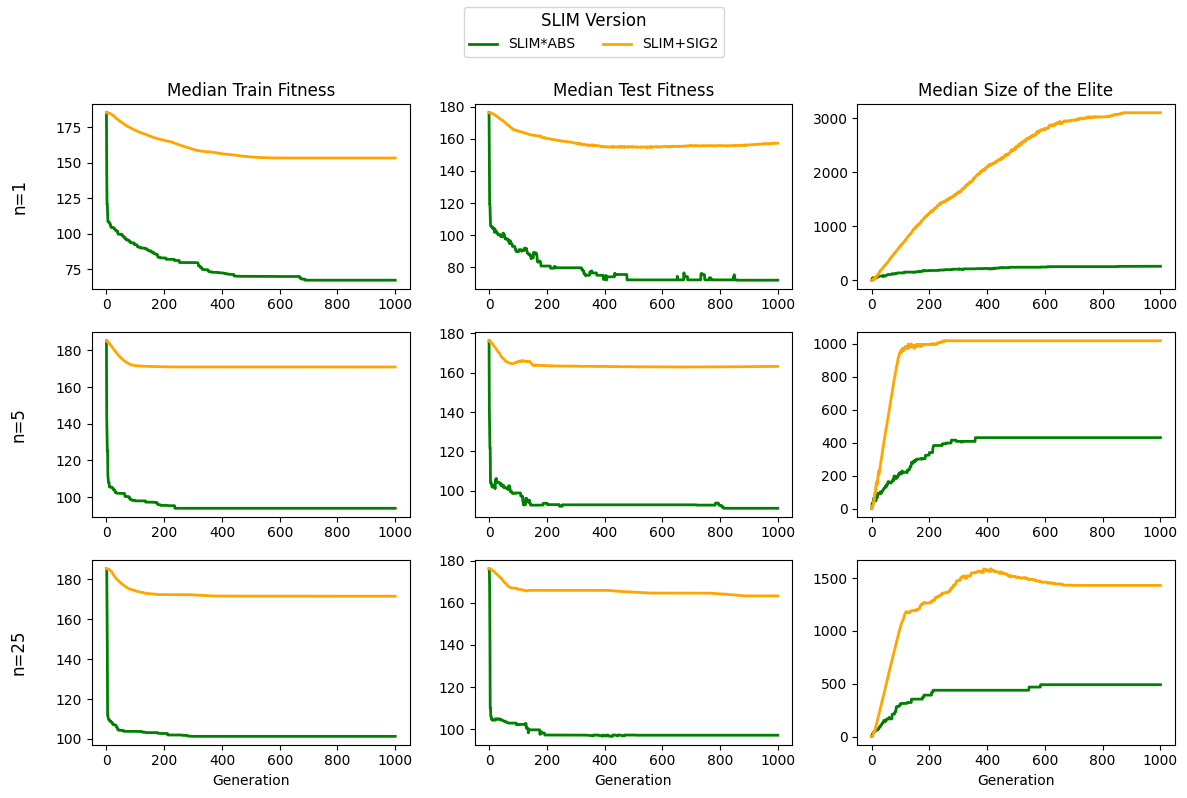

In [69]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "donor_n_xo", ['log/donor_n_xo/1_new_donor_n_xo/resid_build_sale_price_1_new_donor_n_xo.csv', 'log/donor_n_xo/5_new_donor_n_xo/resid_build_sale_price_5_new_donor_n_xo.csv', 'log/donor_n_xo/25_new_donor_n_xo/resid_build_sale_price_25_new_donor_n_xo.csv'], "resid_build_sale_price")

#### Toxicity

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/donor_n_xo/donor_n_xo_toxicity.png


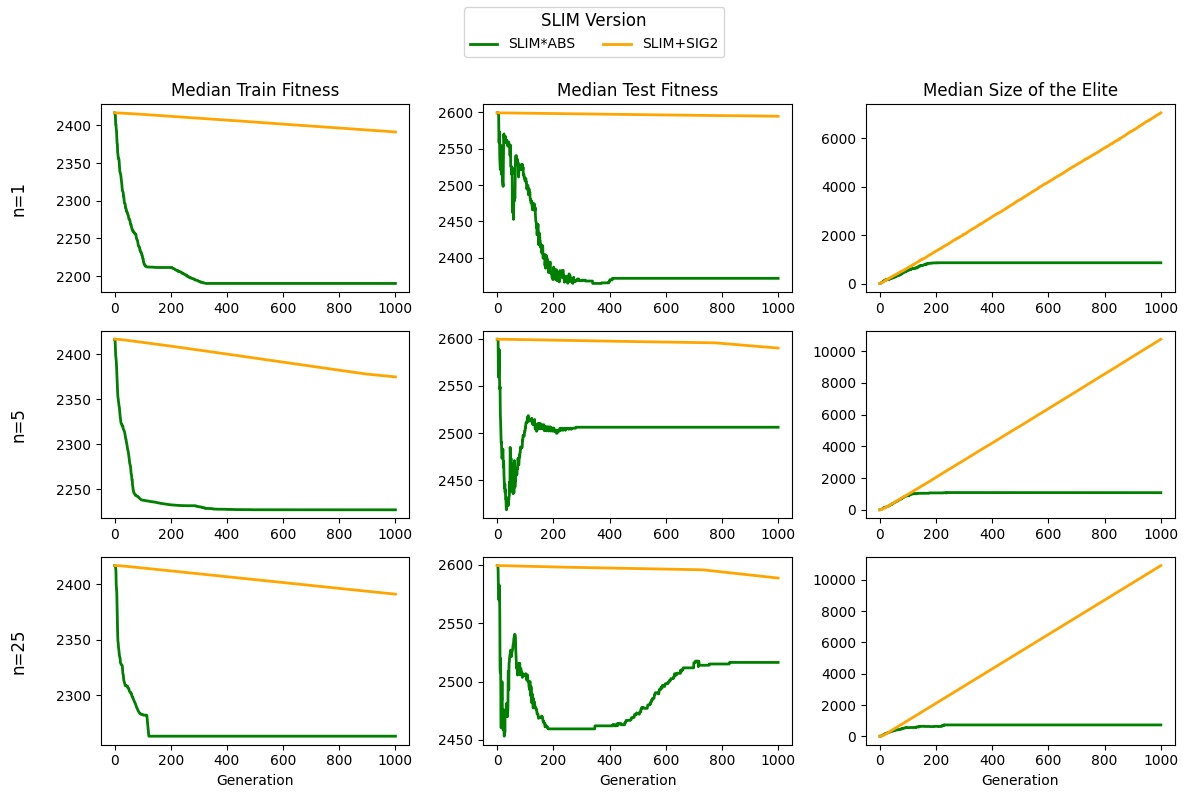

In [70]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "donor_n_xo", ['log/donor_n_xo/1_new_donor_n_xo/toxicity_1_new_donor_n_xo.csv', 'log/donor_n_xo/5_new_donor_n_xo/toxicity_5_new_donor_n_xo.csv', 'log/donor_n_xo/25_new_donor_n_xo/toxicity_25_new_donor_n_xo.csv'], "toxicity")

## Best_donor_xo

## Best n_donor_xo

## Dif_donor_n_xo

## Dif_best_donor_n_xo